# Deep Hedging
### Vanilla Deep Hedging engine with dynamic training update.
Hans Buehler, December 2022


Tensorflow version 2.7.0
Deep Hedging Engine: first of 400 epochs for 10000 samples / 1000 validation samples started ...  

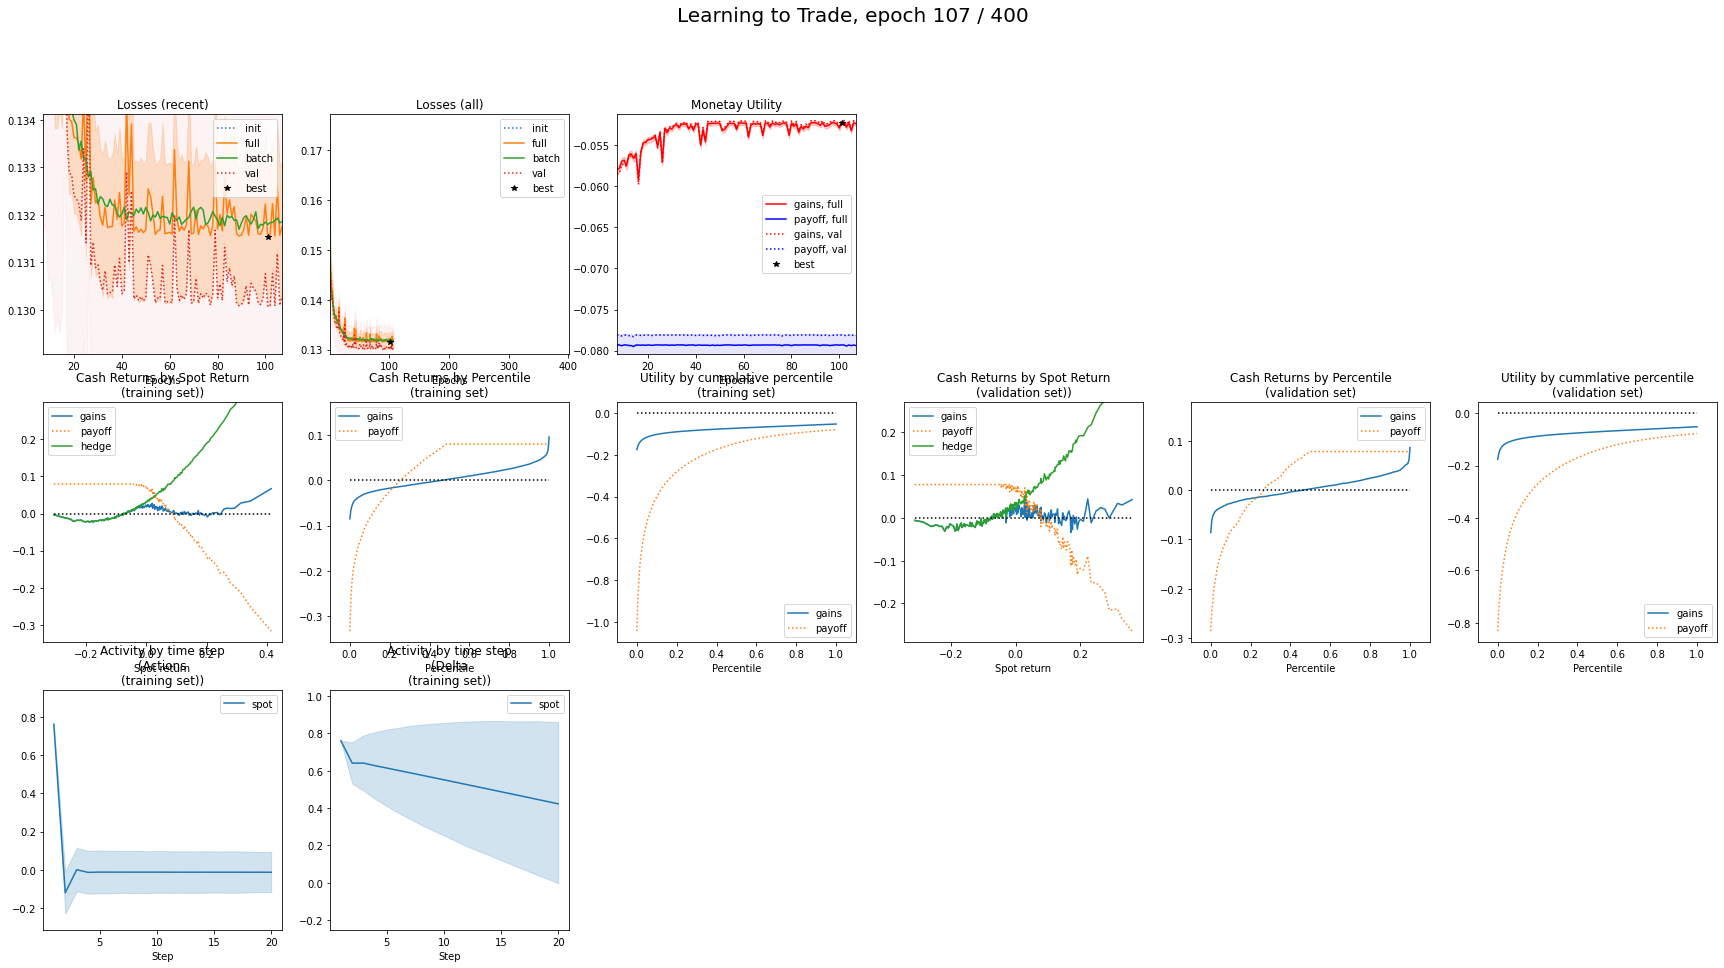

Training 107/400 epochs; 10000 samples; 1000 validation samples batch size 32 | initial loss 1.43258 (0.0333675), full 0.131754 (0.00137515), best 0.131542 (0.0333675), batch 0.131861, val 0.130278 (0.00400076). Best batch 100 | time elapsed 10:55; estimated time remaining 30:00  

In [ ]:
import numpy as np

import imp
import packages.cdxbasics.cdxbasics.config as config
imp.reload(config)
import packages.cdxbasics.cdxbasics.dynaplot as dynaplot
imp.reload(dynaplot)
import deephedging.base as base
imp.reload(base)
import deephedging.world as world
imp.reload(world)
import deephedging.agents as agents
imp.reload(agents)
import deephedging.objectives as objectives
imp.reload(objectives)
import deephedging.gym as gym
imp.reload(gym)
import deephedging.trainer as trainer
imp.reload(trainer)

from packages.cdxbasics.cdxbasics.dynaplot import figure, colors_base, colors_tableau
from packages.cdxbasics.cdxbasics.config import Config

from deephedging.trainer import train
from deephedging.gym import VanillaDeepHedgingGym
from deephedging.world import SimpleWorld_Spot_ATM

config = Config()
# world
config.world.samples = 10000
config.world.steps = 20
config.world.black_scholes = True
# gym
config.gym.objective.utility = "exp2"
config.gym.objective.lmbda = 10.
config.gym.agent.network.depth = 3
config.gym.agent.network.activation = "softplus"
# trainer
config.trainer.train.batch_size = None
config.trainer.train.epochs = 400
config.trainer.train.run_eagerly = False
config.trainer.visual.epoch_refresh = 1
config.trainer.visual.time_refresh = 10
config.trainer.visual.pcnt_lo = 0.25
config.trainer.visual.pcnt_hi = 0.75

# create world
world  = SimpleWorld_Spot_ATM( config.world )
val_world  = world.clone(samples=1000)

# create training environment
gym = VanillaDeepHedgingGym( config.gym )

# create training environment
train( gym=gym, world=world, val_world=val_world, config=config.trainer )

print("=========================================")
print("Config usage report")
print("=========================================")
print( config.usage_report() )
config.done()
